# <center>MACHINE LEARNING <br> LAB Session 2</center>

### Due date: up to June, 16th, 23:55h. 
### Submission procedure: via Aula Global.

<br>

## LAB description:

In this seminar we build and analyze two of the main types of unsupervised classifiers in Machine Learning: K-means and Mixture of Gaussians.


The main objectives of this seminar are:

1) Build a K-means clustering from scratch.

2) Train a Mixture of Gaussians and compare with K-means for several datasets. Identify pros and cons of each method.

3) Apply clustering method for real use case: color compression of images.


### Deliverables per team of two persons:
A zip file consisting of:

1. The Juptyer Notebook: it should be functional and have sufficient comments to allow for proper interpretation.

2. A report including: <br>
    (a) the answers to the questions formulated below (with a proper justification of your answers), <br>
    (b) all the figures that appear in your code with appropiate explanations (all the figures must include axis labels, title and legend (if necessary)).

_**Note 1** : make sure the plots you include are large enough to be readable (preferably no more than two figures per page)._<br>
_**Note 2** : do not explain your code on the report, the code must be understood with the comments alone._<br>
_**Note 3** : the report must be self contained, the reader should not have to look at the code to understand the report._

***
## EXERCISE 1 - K-means
 In this exercise we will cluster a set of points using a K-means method. To achieve this goal, we will build a K-means function from scratch taking into account two main aspects:
 
**a) Number of cluster**, i.e. value of K
 
**b) Number of iterations**, i.e. number maximum of iteration of the centroids' position adjustment
 
Furthermore, we will develop a "calculate_distance" function that will determine the distance of each point to every centroid. 

### Data generation: creation of points and clusters (blobs)

In [1]:
# Library import
import matplotlib.pyplot as plt
import matplotlib.mlab
import math
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

#Points generation
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#Data visualization
plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

<Figure size 640x480 with 1 Axes>

**Q1) How many clusters do you identify by visual inspection? Any point under doubt?**

### K-means function
Develop a K-means function with 4 parameters:

1) Data to classify

2) Seed for random initialization

3) Number of iteration to convergence centroids

4) A flag to show or not the centroid evolution

In [72]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np


#Function to calculate the distance between each point and the centroid
def calculate_distance (X, centroids):
    squareDistance=[]
    for centroid in centroids:
        x = (X-centroid)**2
        #print(x)
        squareDistance.append((x[:,0]+x[:,-1])**(1))
        
        #squareDistance.append(np.dot(X-centroid, X-centroid))
    return np.matrix(np.transpose(squareDistance))




def K_means_clustering(X, n_clusters, seed=1, num_iterations=10, show_centroids=True):
    # Initialitize centroids based on a random selection of #n_clusters samples of X 
    rng = np.random.RandomState(seed)
    i = rng.permutation(X.shape[0])[:n_clusters] 
    centroids = X[i]
    #print(centroids)
    #Repeat the process during num_iterations or convergence achieved
    distances = calculate_distance(X,centroids)
    #print(distances)
    new_centroids = np.zeros((n_clusters,2))
    for num in range(0,num_iterations):
    
    #For each iteration, calculate the shortest distance of each point of X to centroids
    #Labels are based on the index in the centroids array
        
        
        distances = calculate_distance(X,centroids)
        clusters = distances.argmin(1)
        
        
        for i in range(0,n_clusters):
            mean = np.zeros((1,2))
            for x in (np.where(clusters == i)[0]):
                mean = mean + X[x]
            new_centroids[i]=mean /len(np.where(clusters == i)[0])
            #new_centroids[i]= mean    
        
        
        print(centroids)
              
        #print(results)
        # Evaluate convergence: if new_centroids=centroids, stop iterations
        '''
        if np.all(centroids == new_centroids):
            print('Convergence achieved with:',num, 'iterations')
            break
        else:
            if num%10 == 0 and num != 0:
                print('No convergence yet after', num, 'iterations')
        '''        
        
        labels = np.transpose(np.array(clusters))[0]
        #print(labels)
        
        #Plot the centroid evolution if show_centroids=True
        
        if(show_centroids==True):
            plt.scatter(X[:, 0], X[:, -1],c = labels , s =40, cmap = 'viridis')
            plt.scatter(centroids[:,0],centroids[:,1], s = 200)
            plt.xlabel('X Coordinates')
            plt.ylabel('Y Coordinates')
            plt.draw()
        centroids = new_centroids
        
    distances = calculate_distance(X,centroids)
    clusters = distances.argmin(1)
    
    labels = np.transpose(np.array(clusters))[0] 
    #print(labels)
    return centroids, labels

**Q2) Execute K_means function with K=2, 3, 4 and 8 and number of iterations=15. From your point of view, which is the best value for K? How many iterations are needed to achieved convergence of centroids?**

[[-1.73163168  7.16447286]
 [ 1.34195197  0.59357385]
 [ 1.43289271  4.37679234]
 [ 1.71444449  5.02521524]]
[[-1.37324398  7.75368871]
 [ 1.94385045  0.87306002]
 [-1.01691695  3.1575702 ]
 [ 1.16814556  4.65734294]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.49500323  2.87141784]
 [ 0.99305006  4.46336785]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75368871]
 [ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]
[[-1.37324398  7.75

[]

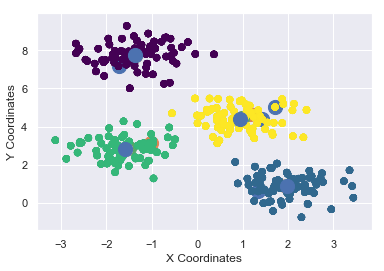

In [73]:
#Execute K-means clustering and show the evolution of centroids
centroid, labels = K_means_clustering(X, 4, seed=1, num_iterations=10, show_centroids=True)
plt.scatter(X[:, 0], X[:, -1],c = labels , s =40, cmap = 'viridis')
plt.scatter(centroid[:,0],centroid[:,1], s = 200)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.plot()


**Q3) Execute _K_means_ _ _clustering_ function with K=4 and number of iterations=15. How many iterations are required? Print the final centroids position and plot them with the data.**

In [4]:
#Execute K-means clustering without showing the evolution of centroids
##################
# Add your code  #
#      HERE      #
##################


#Plot points according to their last clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=50, cmap='viridis')

#Plot last centroids
#################
# Add your code  #
#      HERE      #
##################



print(centroids)

NameError: name 'labels_kmeans' is not defined

**Q4) Calculate distance to each centroid and evaluate for the first 5 data points. Is the cluster allocation consistent with the distant to each centroid?**

In [ ]:
#Calculate distance to each centroids and evaluate for the first 5 points
#################
# Add your code  #
#      HERE      #
##################

distance_tocentroids = ?

labels2=labels.reshape(-1,1)
X_results=np.append(X, labels2, axis=1)
X_results=np.append(X_results, distance_tocentroids,axis=1)
print (X_results[:5])

***
## EXERCISE 2 - Mixtures of Gaussians (MofG)

In this exercise we will cluster the same set of points as in K-means but using a Mixture of Gaussians method. 
One of the key differences of Mixture of Gaussians(MofG) with respect to K-means is that MofG contains a probabilistic model. Therefore, it is possible to find probabilistic cluster assignments for each point.

Finally, we will compare both clustering methods, i.e. K-means and Mixture of Gaussians, in two scenarios of point distribution and we will evaluate their differences.

**Q5) Create a MofG model for X using Sklearn library. In comparision with K-means (K=4), is there any difference? Explain them.**

In [ ]:
#Import Gaussian Mixture function from sklearn library
from sklearn.mixture import GaussianMixture

#Create a model with 4 components, fit it to X and clusterise the data matrix X with it

#################
# Add your code  #
#      HERE      #
##################

labels_gmm = ?


#Plot the points with their corresponding labels after clustering
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gaussian Mixture clustering')
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=40, cmap='viridis');

**Q6) For each point, estimate the probability of belonging to each cluster. In the resulting figure, why do some points have a smaller size?**

In [ ]:
#Estimate the probability of belonging to each cluster for the top 10

#################
# Add your code  #
#      HERE      #
##################

probs = ?


#Create a dataset with probabilities and show them for the top 10
probs_dataset = pd.DataFrame({'Prob_C1': probs[:, 0],'Prob_C2': probs[:, 1], 'Prob_C3': probs[:, 2],'Prob_C4': probs[:, 3]})
print(probs_dataset[:10].round(3))

In [ ]:
#Plot GMM cluster based on the probability to belong to each one
size = 50 * probs.max(1) ** 100  # to emphasize differences between probabilities of each point
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis', s=size);

### K-means and Mixture of Gaussians comparision

As in K-means, Gaussian mixture model uses an expectation–maximization strategy:

1st) Choose starting guesses for the location and shape

2nd) Repeat until convergence:

E-step: for each point, find weights encoding the probability of membership in each cluster
M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights


The result of this is that each cluster is associated with a smooth Gaussian model. 

In this exercise, we will evaluate the distribution of a Mixture of Gaussians clustering and its difference with K-means in two different X dataset distribution:

1) Normal point dataset

2) Stretched version of the point dataset

Firstly, let's create a new function to plot Mixture of Gaussians clusters and its ellipses associated to each distribution.

In [ ]:
#Create a function to draw the clusters and the ellipses based on Mixture of Gaussians clustering output
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    fig,ax = plt.subplots(figsize=(10,10))
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

**Q7) Execute the _plot_ _ _gmm_ function with X. Explain the result of the cluster output.**

In [ ]:
#Execute the plot_gmm function with X
#################
# Add your code  #
#      HERE      #
##################


**Q8)  Plot the K-means and the MofG clusters. Explain the differences between K-means and Gaussian Mixture clustering methods.**

In [ ]:
#Plot the Gaussian Mixture Model for X dataset

#################
# Add your code  #
#      HERE      #
##################


#Plot the K-means for X dataset

#################
# Add your code  #
#      HERE      #
##################



**Q9) For the new dataset _X_stretched_, plot the resulting clusters with K-means and MofG. Which is the clustering methodology that fits better the new dataset distribution? Why?**

In [ ]:
#Create a new version of X changing its distribution and plot it
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
plt.figure(figsize=(20,10))


#Execute K-means (K=4) with the new X_strethed dataset and plot it
#################
# Add your code  #
#      HERE      #
##################


#Execute Gaussian of Mixture (K=4) with the new X_strethed dataset and plot it
#################
# Add your code  #
#      HERE      #
##################


**Q10) Plot the MofG clusters and the Gaussian ellipses and explain the resulting figure. Identify in the figure the points with high probability of belonging to several clusters. Which clusters does the K-means method assign these points to?**

In [ ]:
#Plot the Gaussian Mixture Model distribution for new X_stretched dataset

#################
# Add your code  #
#      HERE      #
##################



***
## EXERCISE 3 - Image color compression using clustering

Clustering is a very interesting and useful technique with a lot of applications: customer segmentation, recommendation engines, and so on. One interesting application is image compression. 
In this exercise, we will compress a flower image just reducing the number of colours in the image. 
This real application is based on the fact that in most images, a large number of the colors will be indistinguishable by the human eye. Therefore, **image compression based on clustering allows to reduce the number of these colours that cannot be detected.**

In [ ]:
#Import image library and load the "flower.jpg"
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")

#Plot the image
fig,ax = plt.subplots(figsize=(10,10))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
#Verify the shape of the flower dataset
flower.shape

**Create a 2D data matrix containing all the pixels in the image in rows and the RGB values in columns, i.e., vectorise the image to a (height*width) x 3 matrix. Then rescale the RGB values to [0,1] scale.**

In [ ]:
#As each pixel has a value between 0 and 255, we will reshape the data (vectorising the image) and rescale it to [0-1] scale
#################
# Add your code  #
#      HERE      #
##################

#Solution
data = flower / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

**Apply K-means clustering to the 2D data matrix with K=5 and calculate the new colors of each pixels based on the centroids of each cluster.**

In [ ]:
#Apply a K-means with K=5: create the model and fit to the rescaled image
#################
# Add your code  #
#      HERE      #
##################

#Solution
# kmeans = KMeans(n_clusters=5, random_state=0)
# kmeans.fit(data)
centroids, labels = K_means_clustering(data, 5, seed=1, num_iterations=50, show_centroids=False)


#Calculate the new colours based on the centroids of each cluster
#################
# Add your code  #
#      HERE      #
##################

#Solution
# new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
new_colors = centroids[labels,:]

**Q11) Explain the differences between the orginal and the clustered images.**

In [ ]:
#Apply the new colours to the image and plot both images
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Flower Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('New color Flower Image with K colours', size=16);

**Q12)  Repeat image compression with K=2, 10 and 20. Which are the main differences?**